In [52]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [53]:
#Read the data set and display the first few rows of the data set
co2_data = pd.read_csv("owid-co2-data.csv")
co2_data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [54]:
#Provides the summary statistics of the data set
co2_data.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,48058.000000,3.949500e+04,1.456400e+04,23764.000000,22017.000000,30308.000000,28157.000000,25136.000000,23320.000000,23030.000000,...,2593.000000,41724.000000,37620.000000,41724.000000,41724.000000,37620.000000,6354.000000,6354.000000,4398.000000,4397.000000
mean,1926.842565,6.083223e+07,2.677586e+11,9.109400,0.066798,391.272161,5.868310,20.055703,534.225708,7.445587,...,19.199870,2.190116,0.002956,0.006886,0.010069,0.000497,790.430981,759.384745,-7.157874,20.368010
std,59.414846,3.285867e+08,2.103151e+12,66.463548,0.125367,1855.824655,59.845871,687.366449,2164.644277,97.593192,...,33.432368,9.012474,0.016068,0.039698,0.057196,0.002943,3610.534250,3531.641287,269.156220,52.720717
min,1750.000000,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,-2032.366000,-100.000000,-187.847000,-2334.695000,...,0.000000,-0.899000,-0.001000,0.000000,-0.001000,0.000000,-186.660000,0.010000,-2367.758000,-99.795000
25%,1883.000000,3.464375e+05,7.516679e+09,0.000000,0.000000,0.183000,0.000000,-0.733500,5.950750,-0.752750,...,0.249000,0.003000,0.000000,0.000000,0.000000,0.000000,8.450000,7.042500,-3.024750,-6.287000
50%,1930.000000,2.456362e+06,2.597999e+10,0.029000,0.008000,3.856000,0.026000,3.749500,27.777000,0.071000,...,1.431000,0.071000,0.000000,0.000000,0.000000,0.000000,38.285000,30.830000,1.478500,8.741000
75%,1976.000000,1.008038e+07,1.132942e+11,0.834000,0.093000,47.277250,0.873000,10.593500,124.373750,2.568500,...,19.405000,0.329000,0.001000,0.001000,0.001000,0.000000,153.595000,131.512500,9.124000,32.512000
max,2022.000000,7.975105e+09,1.136302e+14,1692.404000,2.574000,37149.785000,1813.064000,102318.508000,41637.617000,2340.859000,...,100.000000,100.000000,0.415000,1.113000,1.611000,0.083000,49880.602000,48089.621000,2187.777000,576.482000


In [66]:
#Clean the data, remove the unavailable values
cleaned_data = co2_data.dropna()
#Create a list containing the columns I'm interested in using
selected_columns = ["year", "co2", "country"]
#Fillter out other countries besides the ones I choose, I choose China, Russia, and United States
cleaned_data = cleaned_data[cleaned_data["country"].isin(["China", "Russia", "United States"])].reset_index(drop=True)
#Create a data frame for the selected columns
df = cleaned_data[selected_columns] 
#Displays the first few rows of the DataFrame
df.head()

,year,co2,country
0,1990,2484.855,China
1,1991,2606.096,China
2,1992,2730.788,China
3,1993,2921.651,China
4,1994,3103.739,China


Text(0.5, 1.0, 'CO2 emission in history')

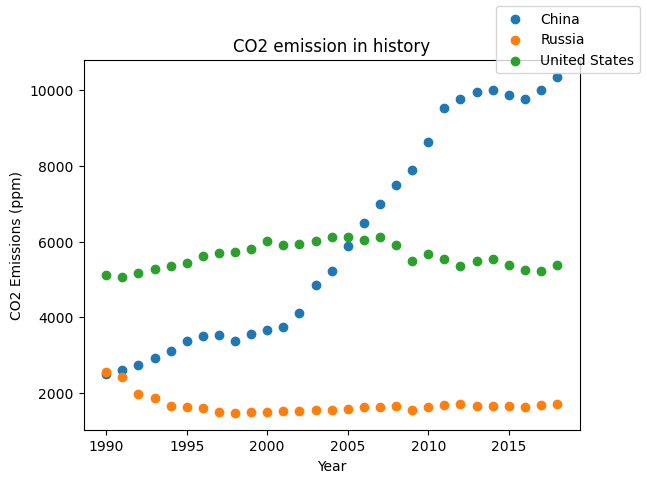

In [67]:
# Creates a scatter plot for each country that I selected, displaying the CO2 emission ammount of each country
fig, ax = plt.subplots()
# The for loop goes through each country, extract the data from that country and plot it into the graph
for country in df["country"].unique():
	country_df = df[df["country"] == country]
	ax.scatter(country_df["year"], country_df["co2"], label=country)
# Adds the legends to display which color presents which country
fig.legend()
# Adds the labels and the title to help understanding the graph
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (ppm)")
ax.set_title("CO2 emission in history")

In [69]:
# Seperate data from each country and make them into different data frames
china_df = df[df["country"] == "China"]
russia_df = df[df["country"] == "Russia"]
us_df = df[df["country"] == "United States"]
# Create variables to hold values I need
china_years = china_df["year"].values.reshape(-1, 1)
china_co2_emissions = china_df["co2"].values
russia_years= russia_df["year"].values.reshape(-1, 1)
russia_co2_emissions = russia_df["co2"].values
us_years = us_df["year"].values.reshape(-1, 1)
us_co2_emissons = us_df["co2"].values

In [70]:
# Split the data into training and testing sets (just select 1 country)
X_train,X_test, y_train, y_test = train_test_split(china_years, china_co2_emissions, test_size=0.2, random_state=42)

In [71]:
# Performs the linear regression for CO2 emission in china over the years
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [72]:
#Generate prediction for training and testing set
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [73]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) for training and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [74]:
#Print out the results to evaluate the performance of the model
print(f"Training MSE: {mse_train:.2f}")
print(f"Training R-squared: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Testing R-squared: {r2_test:.2f}")

Training MSE: 451950.37
Training R-squared: 0.95
Testing MSE: 814087.66
Testing R-squared: 0.90


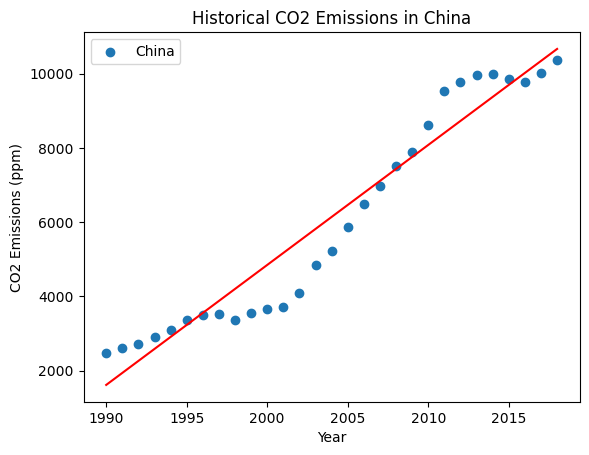

In [75]:
# Fit a linear regression model to the data and plot both the scatter plot of CO2 emissions over the years and the regression line
fig, ax = plt.subplots()
ax.scatter(china_years, china_co2_emissions, label="China")
ax.plot(china_years, reg.predict(china_years), color="red")
# Add the labels and title
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (ppm)")
ax.set_title("Historical CO2 Emissions in China")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Predicting Future CO2 Emissions in China')

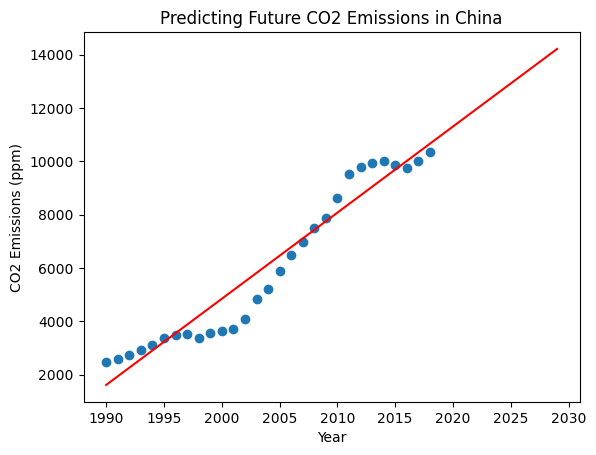

In [78]:
# Adds the years I want to predict
years_to_predict = np.arange(1990, 2030).reshape(-1, 1)
fig, ax = plt.subplots()
# The scatter plot of existing CO2 emission data for China
ax.scatter(china_years, china_df["co2"], label="China")
# Plot the regression line for predicting the future CO2 emissions in China using the linear regression model
ax.plot(years_to_predict, reg.predict(years_to_predict), color="red")
# Adds labels and title 
ax.set_xlabel("Year")
ax.set_ylabel("CO2 Emissions (ppm)")
ax.set_title("Predicting Future CO2 Emissions in China")